In [ ]:
!pip -qq install diffusers transformers accelerate torch xformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 70.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.4/906.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from PIL import Image
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, DDIMScheduler, PNDMScheduler, DPMSolverMultistepScheduler
from diffusers import StableDiffusionImg2ImgPipeline
from diffusers.utils import load_image

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
control_canny = ControlNetModel.from_pretrained(
    "lllyasviel/sd-controlnet-canny",
    torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/920 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
control_qr = ControlNetModel.from_pretrained(
    "monster-labs/control_v1p_sd15_qrcode_monster", # Trained and cloned down+mid blocks,
    #                                                 # plus trained 1x1 (initially "zero") convs.
    # revision="e1d12ce3caa8a1bc9fc58ca49a9831fa11c53337", #v1
    revision="f34e38a62f14b0900587eb362d132f4b91c78d36", #v2
    torch_dtype=torch.float16)

config.json:   0%|          | 0.00/955 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/1.45G [00:00<?, ?B/s]

In [ ]:
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    # Frozen base SD model
    "stablediffusionapi/revanimatedv122",
    # "Envvi/Inkpunk-Diffusion",
    # "stable-diffusion-v1-5/stable-diffusion-v1-5",
    # "runwayml/stable-diffusion-v1-5",
    num_hidden_layers=11,
    controlnet=[control_canny, control_qr],
    safety_checker=None,
    torch_dtype=torch.float16
)

model_index.json:   0%|          | 0.00/584 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/379 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/520 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/606 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.69k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Keyword arguments {'num_hidden_layers': 11} are not expected by StableDiffusionControlNetPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stablediffusionapi--revanimatedv122/snapshots/132d312a5ef74d2a949c06f5e11e4f38fde2645f/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--stablediffusionapi--revanimatedv122/snapshots/132d312a5ef74d2a949c06f5e11e4f38fde2645f/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--stablediffusionapi--revanimatedv122/snapshots/132d312a5ef74d2a949c06f5e11e4f38fde2645f/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/mo

In [ ]:
pipe.enable_xformers_memory_efficient_attention()
# from diffusers import EulerAncestralDiscreteScheduler
from diffusers import DPMSolverMultistepScheduler
# from diffusers import StableDiffusionKDiffusionPipeline
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.set_scheduler('sample_dpmpp_2m')
# pipe.enable_model_cpu_offload()

In [ ]:
import cv2
from PIL import Image
import numpy as np

image = np.array(Image.open("ACMlogo.png").convert("L"))

# Canny edge
low_threshold = 100
high_threshold = 200
image = cv2.Canny(image, low_threshold, high_threshold)

# Create a kernel for dilation
kernel = np.ones((3, 3), np.uint8)  # You can adjust the kernel size
# Dilate the edges
image = cv2.dilate(image, kernel, iterations=4)

# 1 channel --> 3 channel
image = image[:, :, None]
image = np.concatenate([image, image, image], axis=2)
canny_image = Image.fromarray(image)
display(canny_image)

FileNotFoundError: [Errno 2] No such file or directory: '/content/ACMlogo.png'

In [ ]:
input_canny = Image.open("ACM_edges.png")
input_qr = Image.open("ACM_fill_letters.png")
display(input_canny, input_qr)

In [ ]:
# https://github.com/huggingface/diffusers/issues/2136
# 2. Forward embeddings and negative embeddings through text encoder
pipe = pipe.to("cuda")
prompt = "masterpiece, concept art, letters spelling ACM in gold, surrounded by Christmas lights, sharp, beautiful, painterly, detailed, textural, artistic "
# prompt = "masterpiece, concept art, (watercolor painting), Picture a scene resonating with serenity and imagination. Letters spell out ACM in bold black Chinese calligraphy brush strokes, on a white canvas background. In each corner are abstract flowers and trees, also in Chinese calligraphy style. Clean elegant and striking style. Black center letters spell ACM"
# prompt = "(digital painting),(best quality), (masterpiece), letters A C M, yellow and black, (traffic sign), (score_9, score_8_up, score_7_up, score_6_up, score_5_up, score_4_up, high res, 4k)"
neg_prompt = "(worst quality:1.2), (low quality:1.2), (lowres:1.1), (monochrome:1.1), (greyscale), multiple views, comic, sketch, (((bad anatomy))), (((deformed))), (((disfigured))), watermark, multiple_views, mutation hands, mutation fingers, extra fingers, missing fingers, watermark, (rating_safe), (score_3_up, score_4_up, score_5_up, monochrome, vector art, blurry)"
# prompt = "(digital painting),(best quality), (masterpiece), MC Escher, graphite sketch, letters A C M, impossible staircase, (score_9, score_8_up, score_7_up, score_6_up, score_5_up, score_4_up, high res, 4k)"
# neg_prompt = "(worst quality:1.2), (low quality:1.2), (lowres:1.1), (monochrome:1.1), (greyscale), multiple views, comic, sketch, (((bad anatomy))), (((deformed))), (((disfigured))), watermark, multiple_views, mutation hands, mutation fingers, extra fingers, missing fingers, watermark, (rating_safe), (score_3_up, score_4_up, score_5_up, monochrome, vector art, blurry)"
# prompt = "(digital painting),(best quality), (masterpiece), serene Japanese garden, spells letters A C M, cherry blossoms in full bloom, koi pond, footbridge, pagoda, Ukiyo-e art style, Hokusai inspiration, Deviant Art popular, 8k ultra-realistic, pastel color scheme, soft lighting, golden hour, tranquil atmosphere, landscape orientation, (rating_explicit), (score_9, score_8_up, score_7_up, score_6_up, score_5_up, score_4_up, high res, 4k)"
# neg_prompt = "(worst quality:1.2), (low quality:1.2), (lowres:1.1), (monochrome:1.1), (greyscale), multiple views, comic, sketch, (((bad anatomy))), (((deformed))), (((disfigured))), watermark, multiple_views, mutation hands, mutation fingers, extra fingers, missing fingers, watermark, (rating_safe), (score_3_up, score_4_up, score_5_up, monochrome, vector art, blurry)"
max_length = pipe.tokenizer.model_max_length

# Need longest prompt, between positive and negative prompts, to pad correctly
input_len = pipe.tokenizer(prompt, truncation=False, return_tensors="pt").input_ids
neg_len = pipe.tokenizer(neg_prompt, truncation=False, return_tensors="pt").input_ids
longer = max(input_len.shape[-1],neg_len.shape[-1])

input_ids = pipe.tokenizer(prompt, truncation=False, padding="max_length", max_length=longer, return_tensors="pt").input_ids
input_ids = input_ids.to("cuda")

negative_ids = pipe.tokenizer(neg_prompt, truncation=False, padding="max_length", max_length=longer, return_tensors="pt").input_ids
negative_ids = negative_ids.to("cuda")

# Encode 77 tokens at a time
concat_embeds = []
neg_embeds = []
for i in range(0, longer, max_length): #
    print(i)
    concat_embeds.append(pipe.text_encoder(input_ids[:, i: i + max_length])[0])
    neg_embeds.append(pipe.text_encoder(negative_ids[:, i: i + max_length])[0])

prompt_embeds = torch.cat(concat_embeds, dim=1)
negative_prompt_embeds = torch.cat(neg_embeds, dim=1)
print(prompt_embeds.shape, negative_prompt_embeds.shape)

0
77
torch.Size([1, 112, 768]) torch.Size([1, 112, 768])


In [ ]:
import pdb
generator = torch.manual_seed(1192013243)
pipe = pipe.to("cuda")
pipe.enable_xformers_memory_efficient_attention()
# Medieval village scene with busy streets and castle in the distance
with torch.no_grad():
    image = pipe(
        prompt_embeds=prompt_embeds,
        negative_prompt_embeds=negative_prompt_embeds,
        # prompt="(masterpiece:1.4), (best quality), (detailed), MC Escher sketch",
        # negative_prompt="(worst quality, poor details:1.4), lowres, (artist name, signature, watermark:1.4), bad-artist-anime, bad_prompt_version2, bad-hands-5, ng_deepnegative_v1_75t",
        # image=Image.open("face1.png").convert("RGB").resize((768, 512)),
        image=[input_canny, input_qr],#canny_image,
        #  control_image=condition_image,
        width=768,
        height=768,
        guidance_scale=7.5, # Text prompt strength
        controlnet_conditioning_scale=[0.405, 0.05],
        generator=generator,
        strength=0.4, # Noise step strength
        num_inference_steps=10, # DUMB: somehow strength interferes
                                # /overrides num_inference_steps.
        num_images_per_prompt=4
    )

# display(image.images[0])


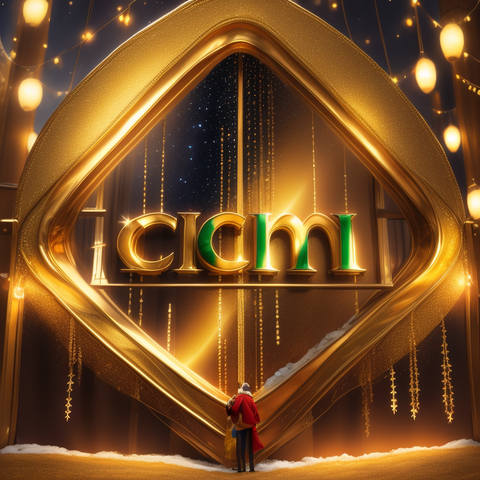

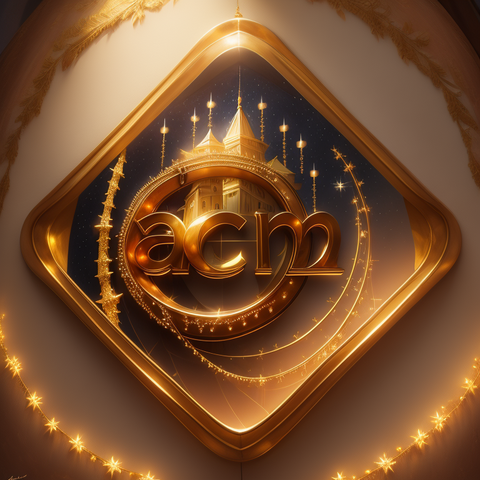

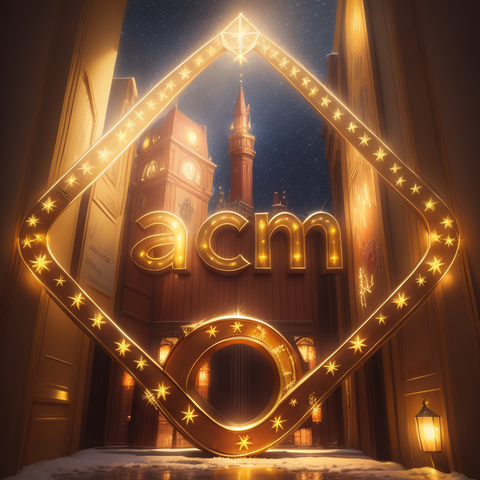

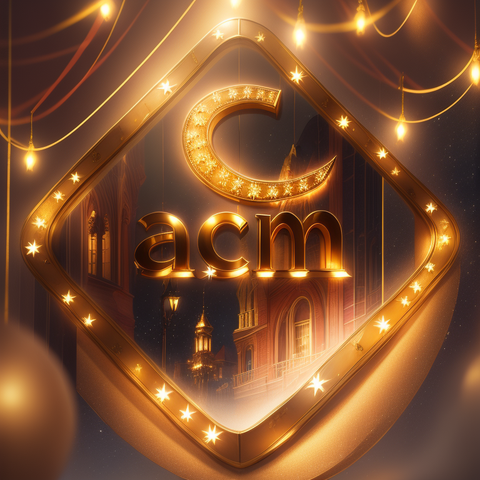

In [ ]:
for img in image.images:
    # display(img)
    display(img.resize((480, 480), Image.Resampling.LANCZOS))

In [ ]:
import matplotlib.pyplot as plt

# # Load your images into a list
# image_paths = ['image1.jpg', 'image2.jpg', 'image3.jpg']  # Replace with your image paths
# images = [Image.open(img_path) for img_path in image.images]

# Display the images
plt.figure(figsize=(30, 10))
for i, img in enumerate(image.images):
    plt.subplot(1, len(image.images), i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

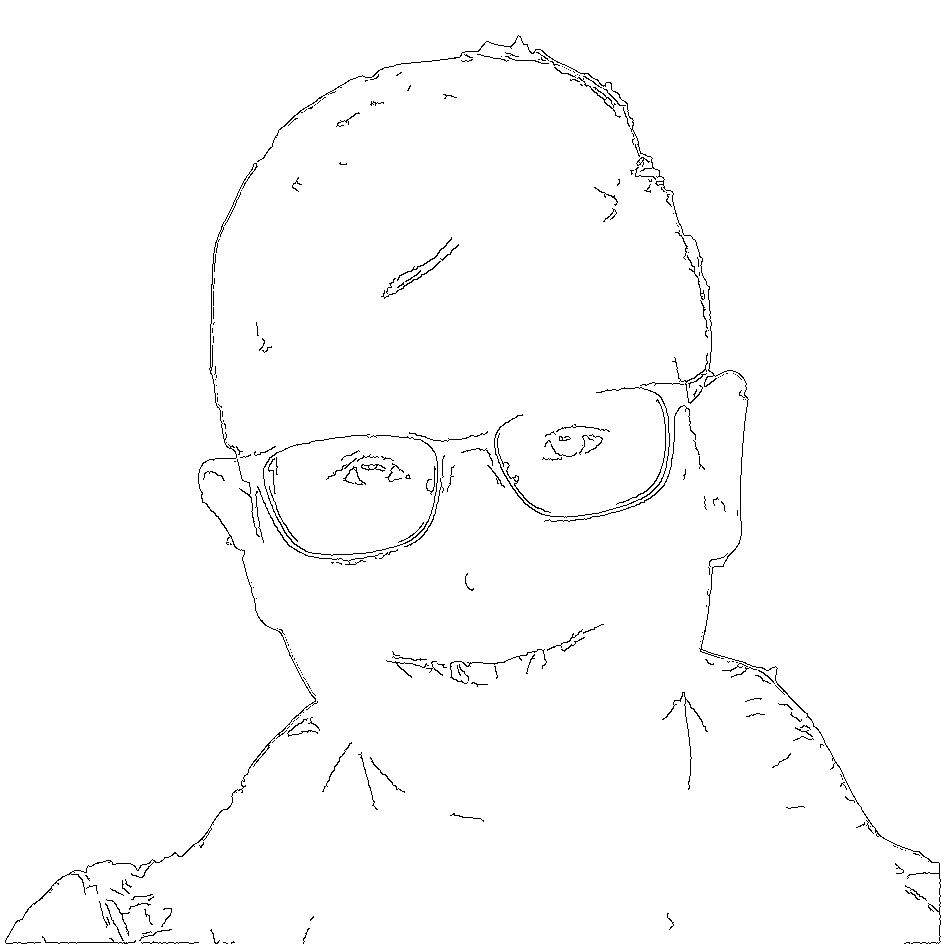

In [ ]:
face = Image.open("face1.png")
import numpy as np
gray = np.asarray(face.convert('L'))
import cv2
edges = cv2.Canny(gray, 100,200)

kernel = np.ones((3, 3), np.uint8)  # Create a 3x3 kernel
# edges = cv2.dilate(edges, kernel, iterations=1)
# edges = cv2.erode(edges, kernel, iterations=1)
edges_pil = Image.fromarray(255 - edges)


# from PIL import ImageFilter
# edges = face.filter(ImageFilter.FIND_EDGES)
display(edges_pil)

In [ ]:
import numpy as np
mask_array = np.asarray(mask)
print(mask_array.shape)

(944, 942, 3)


In [ ]:
mask_bw = np.where(mask_array<170, [0,0,0], [255,255,255])

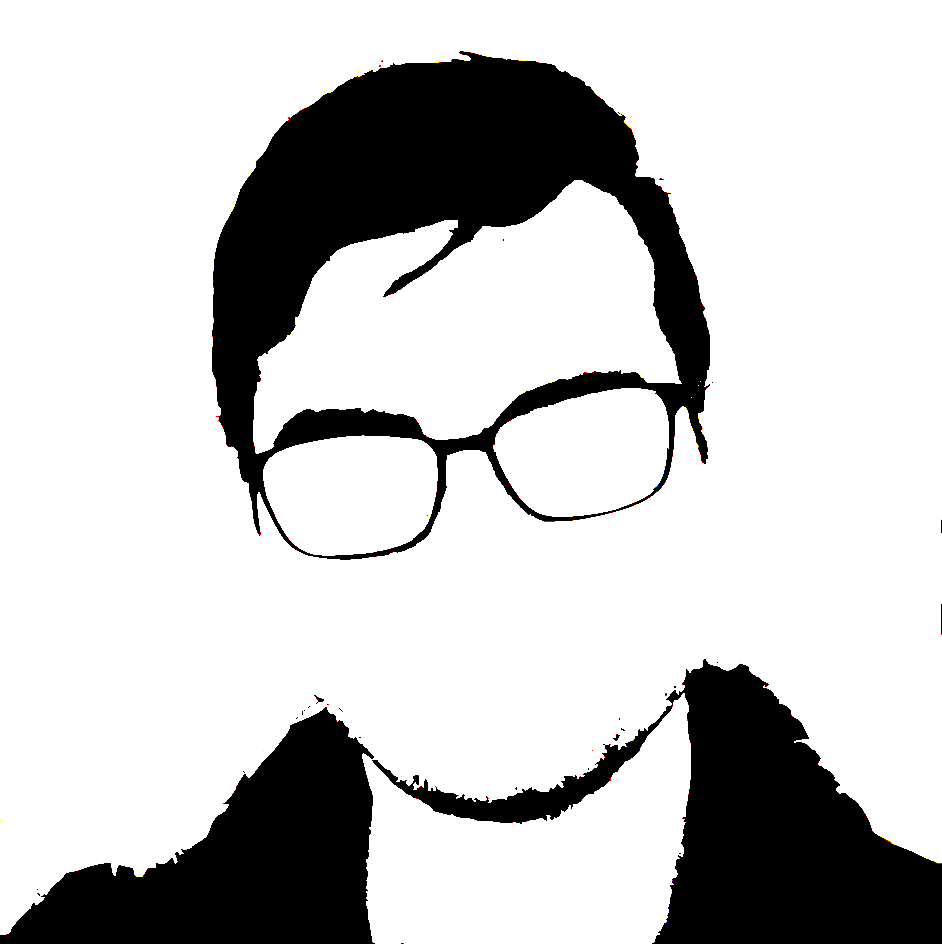

In [ ]:
# mask_bw.min()
mask_bw_og = Image.fromarray(mask_bw.astype(np.uint8))
display(mask_bw_og)

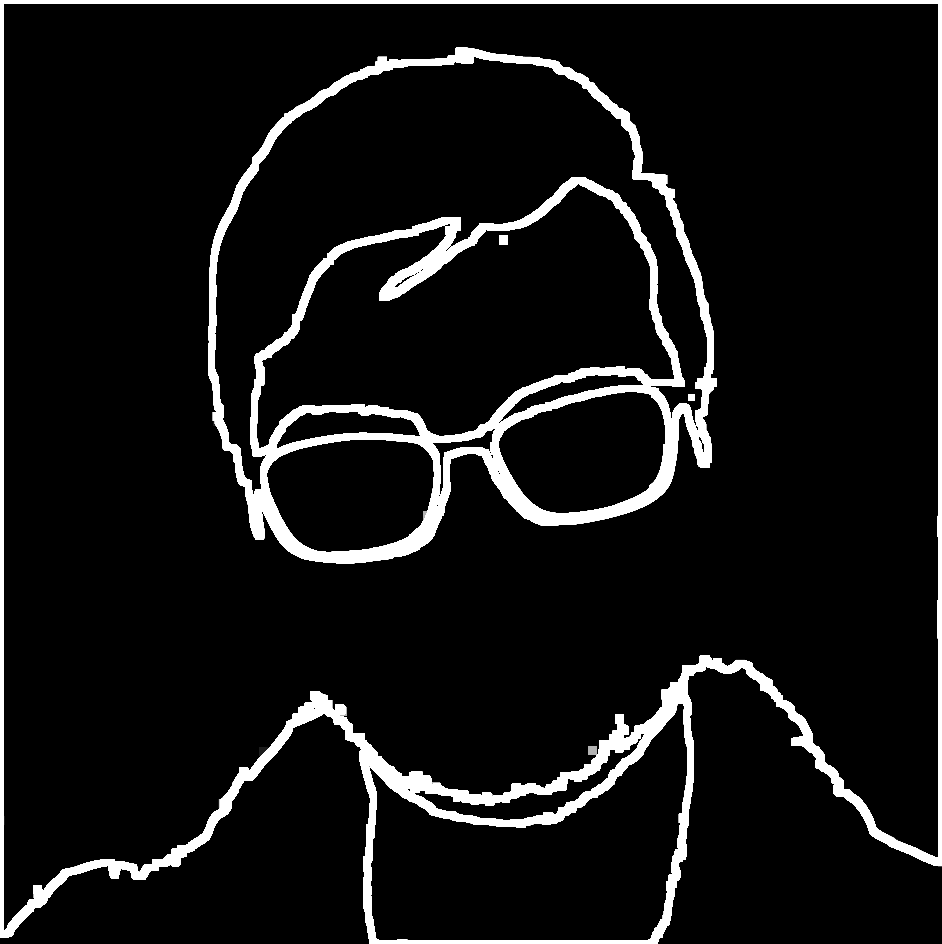

In [ ]:
from PIL import Image, ImageMorph, ImageFilter

# Open star image and ensure greyscale
im = mask_bw.convert('L')

# Detect edges and save
edges = im.filter(ImageFilter.FIND_EDGES)
# display(edges)
# ;es.save('DEBUG-edges.png')

# # Make fatter edges and save
fatEdges = edges.filter(ImageFilter.MaxFilter)
# display(fatEdges)
# fatEdges.save('DEBUG-fatEdges.png')

# # Make very fat edges and save
veryFatEdges = edges.filter(ImageFilter.MaxFilter(7))
display(veryFatEdges)
# veryFatEdges.save('DEBUG-veryFatEdges.png')

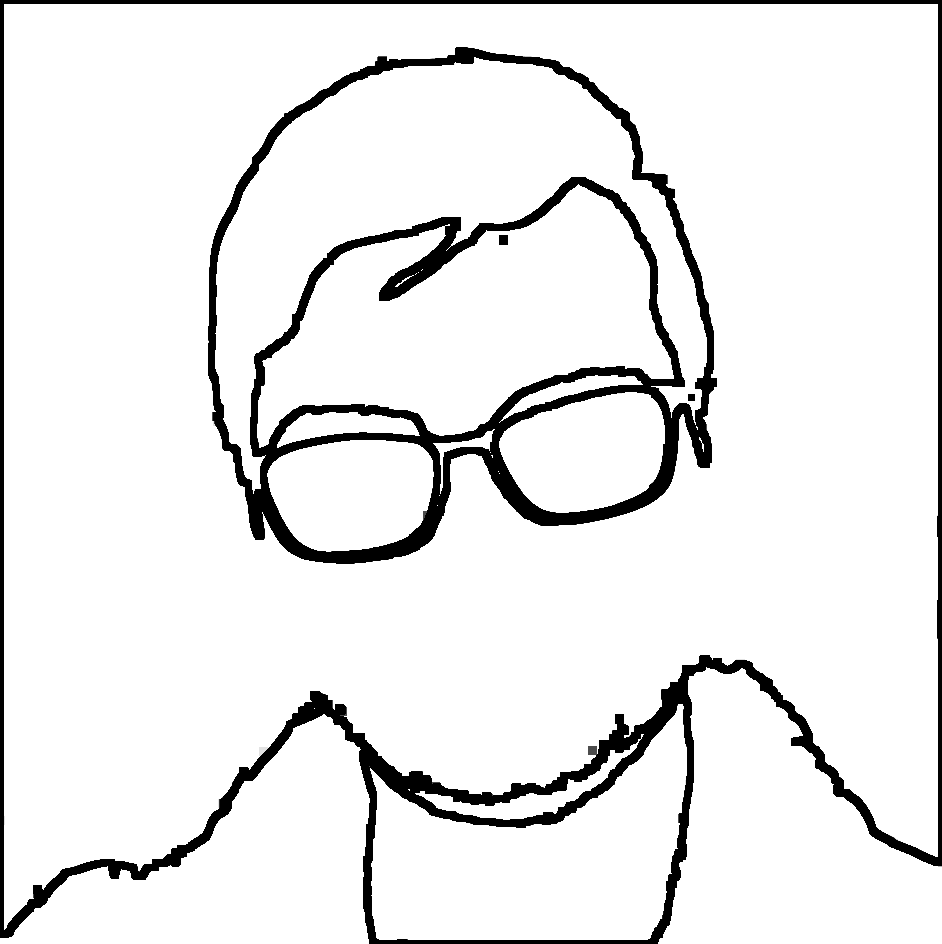

In [ ]:
import PIL.ImageOps
display(PIL.ImageOps.invert(veryFatEdges))

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
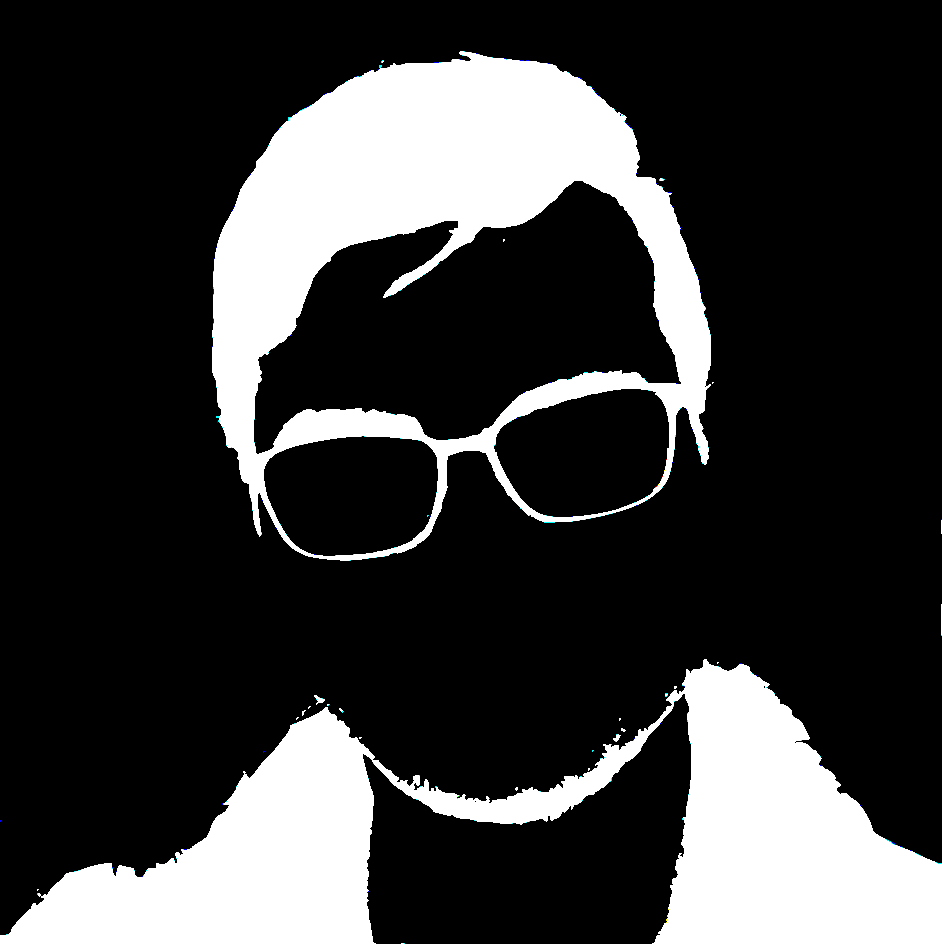

In [ ]:
import cv2
im = 255 - np.asarray(mask_bw_og)

# # Method 1
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
# dilate = cv2.dilate(im, kernel, iterations=1)

# Method 2
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
cnts = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

for c in cnts:
    cv2.drawContours(im, [c], -1, (255,255,255), thickness=15)


# Result
display(dilate)

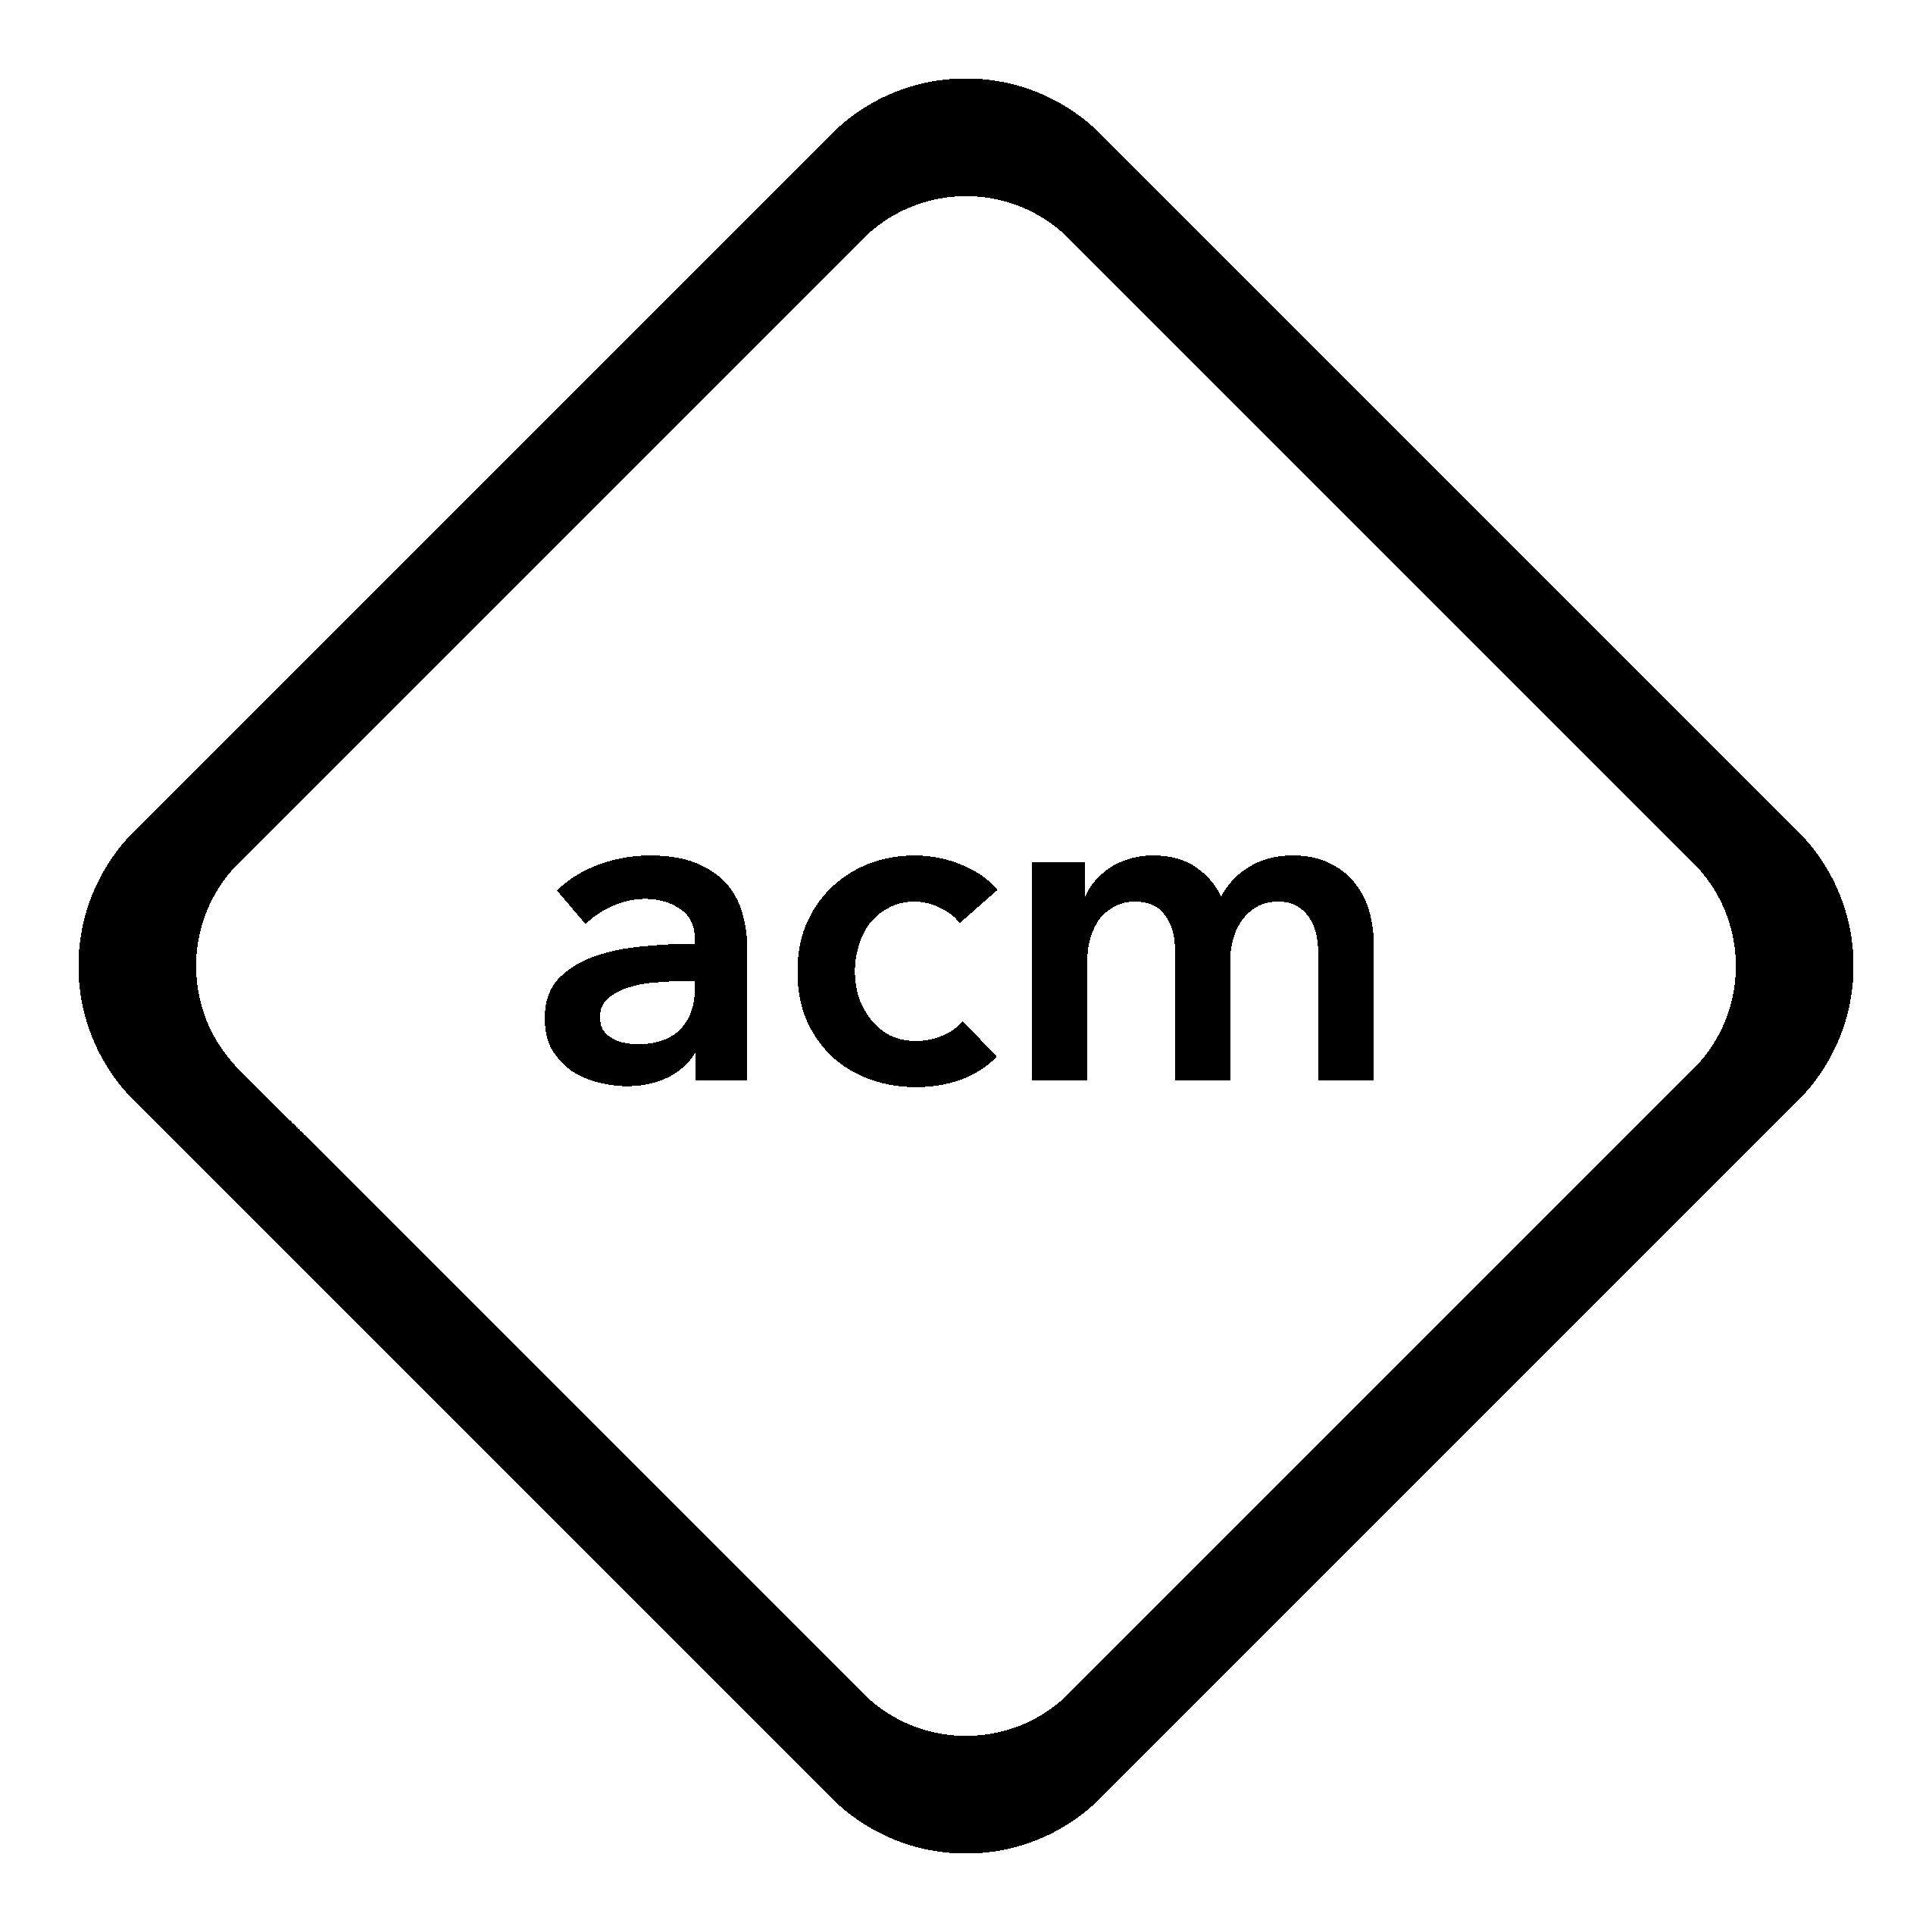

In [ ]:
import numpy as np
arr = np.asarray(Image.open("ACMlogo.png").convert("L"))
arr = Image.fromarray(
        np.where(
            (arr>50) & (arr<250),
            [0],
            [255]
        ).astype(np.uint8)
    )
display(
    arr
)
# # mask_bw = Image.fromarray(255 - dilate)
# import numpy as np
# mask_bw = Image.open("ACMlogo.png").convert("L")
# display(mask_bw)
# print(np.unique(np.asarray(mask_bw)))
# # from scipy import stats
# # modes = stats.mode(np.asarray(mask_bw).flatten())
# print(modes)
# # mask_bw = np.asarray(mask_bw)
# # mask_bw = np.where(mask_bw<60 and mask_bw, [0], mask_bw).astype(np.uint8)
# # display(Image.fromarray(mask_bw))

# # Dumb dumb list
# # 1. Converting between PIL-->numpy(float)-->numpy(uint8) is annoying af
# # 2. stats.mode was the wrong functionality
# # 3. Annoying pixel value distribution


In [ ]:
def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    print(W, H)
    return img

In [ ]:
# play with guidance_scale, controlnet_conditioning_scale and strength to make a valid QR Code Image

# qr code image
# source_image = load_image("https://www.drupal.org/files/project-images/qrcode-module_0.png")
# source_image = load_image("https://as1.ftcdn.net/v2/jpg/02/08/51/18/1000_F_208511842_NYlLBakJKt14RGuOPpumvpcF7SqiXRhl.jpg")
source_image = canny_image #arr
condition_image = resize_for_condition_image(source_image, 768)
# initial image, anything
# init_image = load_image("https://americanmind.org/wp-content/uploads/2023/03/GettyImages-1429150390.jpg")

768 768


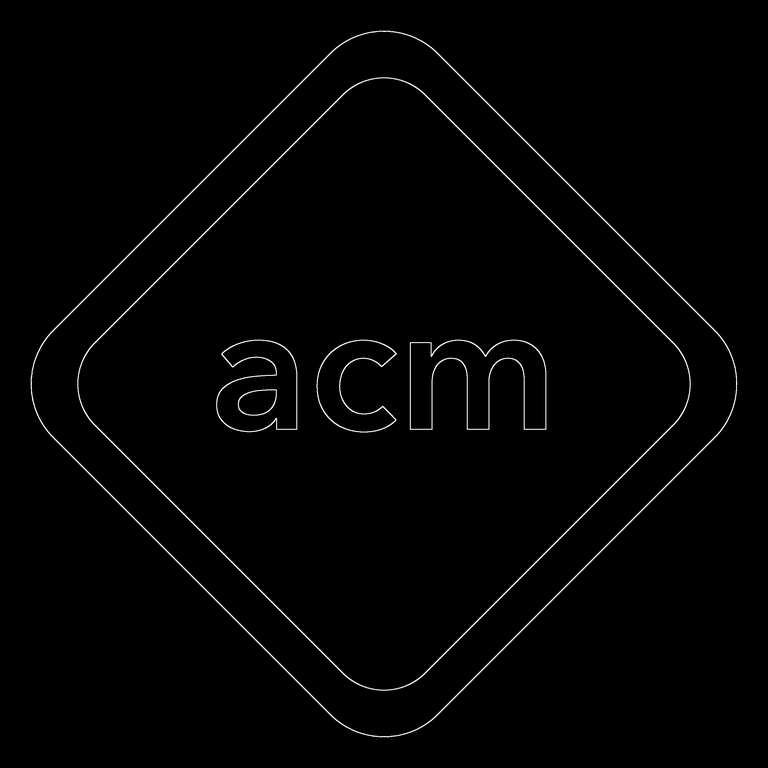

In [ ]:
display(condition_image)
# display(init_image)

# import PIL.ImageOps
# inverted_init_image = PIL.ImageOps.invert(init_image)
# inverted_condition_image = PIL.ImageOps.invert(condition_image)

In [ ]:
# dict(pipe.controlnet.config)
# dict(pipe.controlnet.named_parameters())
# len(list(pipe.components["vae"].named_parameters()))
params = {}
for k,v in pipe.components.items():
    print(k)
    # print(type(v))
    if hasattr(v, 'named_parameters'):
        print(k, len(list(v.named_parameters())))
        print(dict(v.named_parameters()).keys())
        params.update(v.named_parameters())
        v.train()
    print()

vae
vae 248
dict_keys(['encoder.conv_in.weight', 'encoder.conv_in.bias', 'encoder.down_blocks.0.resnets.0.norm1.weight', 'encoder.down_blocks.0.resnets.0.norm1.bias', 'encoder.down_blocks.0.resnets.0.conv1.weight', 'encoder.down_blocks.0.resnets.0.conv1.bias', 'encoder.down_blocks.0.resnets.0.norm2.weight', 'encoder.down_blocks.0.resnets.0.norm2.bias', 'encoder.down_blocks.0.resnets.0.conv2.weight', 'encoder.down_blocks.0.resnets.0.conv2.bias', 'encoder.down_blocks.0.resnets.1.norm1.weight', 'encoder.down_blocks.0.resnets.1.norm1.bias', 'encoder.down_blocks.0.resnets.1.conv1.weight', 'encoder.down_blocks.0.resnets.1.conv1.bias', 'encoder.down_blocks.0.resnets.1.norm2.weight', 'encoder.down_blocks.0.resnets.1.norm2.bias', 'encoder.down_blocks.0.resnets.1.conv2.weight', 'encoder.down_blocks.0.resnets.1.conv2.bias', 'encoder.down_blocks.0.downsamplers.0.conv.weight', 'encoder.down_blocks.0.downsamplers.0.conv.bias', 'encoder.down_blocks.1.resnets.0.norm1.weight', 'encoder.down_blocks.1.re

In [ ]:
# from torch.autograd import Variable
# import torch.autograd.Variable as Variable (Why this no work?!?)

def callback_latents(pipe, step_index, timestep, callback_kwargs):
    # global latents_hook
    # print(f"{latents_hook=}")
    # latents_hook = callback_kwargs["latents"]
    # y = latents_hook
    # pdb.set_trace()
    # pipe_dict = {k:v for k,v in pipe.components.items() if isinstance(v, Variable)}

    # print(f"Of {len(pipe.components)} original pipe.components, {len(pipe_dict)} are torch Variables.")
    # print(step_index, timestep)
    if step_index > 0:
        # fake_loss = callback_kwargs["latents"].mean()
        # fake_loss.backward()
        global params
        dot = torchviz.make_dot(
            callback_kwargs["latents"],
            params=params
            # params=dict(pipe.controlnet.named_parameters())
        )
        dot.render("controlnet_graph", format="png")  # Save as PNG
        display(dot)
    # print(f"{latents_hook.shape=}")
    return callback_kwargs

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=ec62d30ccf8770d2863d5eb013436f1bf6039e2ae60750c0590dd753159e728b
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [ ]:
print(image.images.shape)

torch.Size([1, 4, 8, 8])


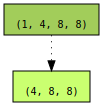

In [ ]:
import torchviz
y = latents_hook

dot = torchviz.make_dot(
    image.images[0],
    params=params,
    show_attrs=True,
    show_saved=True
    # params=dict(pipe.controlnet.named_parameters())
)
# dot.render("controlnet_graph", format="png")  # Save as PNG
display(dot)

In [ ]:
len(params)

1172

In [ ]:
!pip install graphviz torchview

In [ ]:
import torchvision
from torchview import draw_graph

model_graph = draw_graph(pipe.components["controlnet"], input_size=(1,3,64,64), expand_nested=True)
model_graph.visual_graph

RuntimeError: Failed to run torchgraph see error message